In [78]:
from classes import *
import matplotlib.pyplot as plt

Vinegar goes from 4% to 8%m/m. Vinager density is roughly 0.96g/mL.

$\%m/m = \frac{m_{HAcO}}{m_{Vin}} 100$

$\%m/m = \frac{m_{HAcO}}{V_{Vin} \rho_{vin}} 100$ 

$\%m/m = \frac{m_{HAcO} Mr_{HAcO}}{Mr_{HAcO} V_{Vin}(mL) \rho_{vin}(g/mL)} 100$   

$\%m/m = \frac{n_{HAcO}}{V_{vin}(L)} \frac{Mr_{HAcO}}{\rho_{vin}(L)} 100$   

$\%m/m = C_{HAcO}(M) \frac{Mr_{HAcO}}{\rho_{vin}(g/L)} 100$

$C_{HAcO}(M) = \%m/m \frac{\rho_{vin}(g/mL) 1000 ml/L}{Mr_{HAcO} 100}$

$C_{HAcO}(M) = \%m/m \frac{\rho_{vin}(g/mL) 10 ml/L}{Mr_{HAcO}}$

In [79]:
#
rho_vin = 0.96                          #g/mL
MrHAcO = 60.052                         #g/mol

VinagerRange = np.array([4,8])          #%m/m
VinagerRangeMolar = VinagerRange*rho_vin*10/MrHAcO

print(VinagerRangeMolar)

[0.63944581 1.27889163]


Vinager has a high concentration. Approximating activities with concentration may not be valid. Titrate a more diluted acid.

In [80]:

pKaHAcO = 4.756
C0HAcO = 0.001       #M
#C0HAcO = 1e-7       #M
VHAcO = 0.01        #L

MrNAOH = 39.99711   #g/mol
pKaNaOH = 14-0.2
C0NaOH = 0.001       #M
VNaOH = 0.01        #L       

Kw = 1e-14

HAcO = Solution(Mr=MrHAcO, pK=pKaHAcO, Cmolar=C0HAcO, V=VHAcO, solutionType='acid')
NaOH = Solution(Mr=MrNAOH, pK=pKaNaOH, V=VNaOH, Cmolar=C0NaOH, solutionType='basic')

HAcO.K_from_pK()
NaOH.K_from_pK()

Ka:1.754e-05 
Ka:1.585e-14 


# Titration

## $n_{tit} = 0$

In [81]:
coeffAprox = [1, HAcO.K, -HAcO.K*HAcO.Cmolar]
Haprox = np.roots(coeffAprox)[1]
pKaAprox = -np.log10(Haprox)

Hbondi = np.sqrt(HAcO.K*HAcO.Cmolar)
pHbondi = -np.log10(Hbondi)

HAcOaprox = Haprox
HOaprox = Kw/Haprox


print('------------')
print('Approximate result')
print('------------')
print(np.roots(coeffAprox))
print('[H+]: {:.4e} M, pH: {:.4g}, [HO-]: {:.4g} M,  [HAcO]: {:.4g}' .format(Haprox, pKaAprox, HOaprox, HAcOaprox))
print('[H+] (bondi): {:.4e} M, pH: {:.4g}' .format(Hbondi, pHbondi))


print('--------------')
print('Numeric Result')
print('--------------')
pureHAcO = Pure(solution=HAcO)
pureHAcO.calculatepH()




------------
Approximate result
------------
[-0.00014149  0.00012395]
[H+]: 1.2395e-04 M, pH: 3.907, [HO-]: 8.067e-11 M,  [HAcO]: 0.000124
[H+] (bondi): 1.3243e-04 M, pH: 3.878
--------------
Numeric Result
--------------
[H+]:1.2395e-04 M
pH:3.907


3.906736604751039

## $n_{ti} = n_{ac}/2$
This implies $C_{ti} V_{ti} = C_{ac} V_{ac}/2$ since $C_{ti} = C_{ac} \Rightarrow V_{ti} = V_{ac}/2$.

In [82]:
Vti = C0HAcO/C0NaOH * VHAcO/2
Vtot = VHAcO + Vti
CNaOH = C0NaOH*Vti / Vtot 
CHAcO = C0HAcO*VHAcO/Vtot

print('CHAcO: {:.4g} M y CNaOH: {:.4g} M' .format(CHAcO, CNaOH) )
roots = np.roots([1, CNaOH+HAcO.K, HAcO.K*(CNaOH-CHAcO)])
print('------------------')
print('Approximate result')
print('------------------')
print(roots)
roots = roots[roots>0]
Haprox = roots[0]
pHaprox = -np.log10(Haprox)
HOaprox = Kw/Haprox

print('H:{:.4e} M, pH:{:.4g}, [HO-]:{:.4e} M' .format(Haprox, pHaprox, HOaprox))

myTitration = Titration(HAcO, NaOH, Vti)
print('--------------')
print('Numeric Result')
print('--------------')
myTitration.strongTitrantCalculateH()

CHAcO: 0.0006667 M y CNaOH: 0.0003333 M
------------------
Approximate result
------------------
[-3.66810265e-04  1.59381263e-05]
H:1.5938e-05 M, pH:4.798, [HO-]:6.2743e-10 M
--------------
Numeric Result
--------------
[H+]: 1.5938e-05 M and pH:4.798


## $n_{ti}=n_{ac}$
This implies $C_{ti} V_{ti} = C_{ac} V_{ac}$ since $C_{ti} = C_{ac} \Rightarrow V_{ti} = V_{ac}$.


In [83]:
Vti = C0HAcO/C0NaOH * VHAcO
Vtot = VHAcO + Vti
CNaOH = C0NaOH*Vti / Vtot 
CHAcO = C0HAcO*VHAcO/Vtot
print('CHAcO: {:.4g} M y CNaOH: {:.4g} M' .format(CHAcO, CNaOH) )

roots = np.roots([1, Kw/HAcO.K, -CHAcO*Kw/HAcO.K])
print(roots)
roots = roots[roots > 0]
HOaprox = roots[0]
H = Kw/HOaprox 
pH = -np.log10(H)
print('------------------')
print('Approximate result')
print('------------------')
print('[HO-]:{:.4e} M, [H+]:{:.4e} M and pH:{:.4g}' .format(HOaprox,H,pH)) 

myTitration = Titration(HAcO, NaOH, Vti)
print('--------------')
print('Numeric Result')
print('--------------')
myTitration.strongTitrantCalculateH()

CHAcO: 0.0005 M y CNaOH: 0.0005 M
[-5.34215993e-07  5.33645829e-07]
------------------
Approximate result
------------------
[HO-]:5.3365e-07 M, [H+]:1.8739e-08 M and pH:7.727
--------------
Numeric Result
--------------
[H+]: 1.8418e-08 M and pH:7.735


## $n_{ti}=\frac{3}{2}n_{ac}$
This implies $C_{ti} V_{ti} = \frac{3}{2}C_{ac} V_{ac}$ since $C_{ti} = C_{ac} \Rightarrow V_{ti} = \frac{3}{2}V_{ac}$.


In [84]:
Vti = C0HAcO/C0NaOH * 3*VHAcO/2
Vtot = VHAcO + Vti
CNaOH = C0NaOH*Vti / Vtot 
CHAcO = C0HAcO*VHAcO/Vtot
print('CHAcO: {:.4g} M y CNaOH: {:.4g} M' .format(CHAcO, CNaOH) )

roots = np.roots([1, Kw/HAcO.K+CHAcO-CNaOH, CNaOH*Kw/HAcO.K])
roots = roots[roots > 0]
HOaprox = roots[0]
Haprox = Kw/HOaprox 
pH = -np.log10(Haprox)
HAaprox = Haprox*CHAcO/HAcO.K
print('------------------')
print('Approximate result')
print('------------------')
print('[HO-]:{:.4e} M, [H+]:{:.4e} M, pH:{:.4g}, [HA]:{:.4e}' .format(HOaprox,Haprox,pH,HAaprox)) 

myTitration = Titration(HAcO, NaOH, Vti)
print('------------')
print('Exact Result')
print('------------')
myTitration.strongTitrantCalculateH()


CHAcO: 0.0004 M y CNaOH: 0.0006 M
------------------
Approximate result
------------------
[HO-]:2.0000e-04 M, [H+]:5.0001e-11 M, pH:10.3, [HA]:1.1403e-09
------------
Exact Result
------------
[H+]: 5.0000e-11 M and pH:10.3


------------
Exact Result
------------


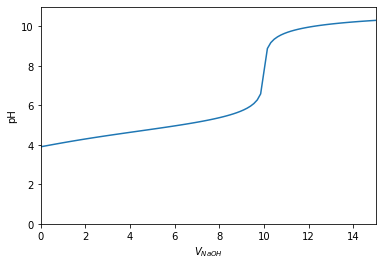

In [95]:
Vti = np.linspace(0, 3/2*VHAcO,100)

myTitration = Titration(HAcO, NaOH, Vti)
print('------------')
print('Exact Result')
print('------------')
myTitration.strongTitrantCalculateH()
pHs = -np.log10(myTitration.H)

Figure, ax = plt.subplots()
ax.plot(Vti*1000, pHs)
ax.set_xlabel('$V_{NaOH}$')
ax.set_ylabel('pH')
ax.set_xlim(0,15)
ax.set_ylim(0,11)
plt.show()

# Many concentrations 
In order to preserve the same volummes, both concentration were reduced equitatively and therefore, equivalence between moles becomes equivalence between volummes (given that this is also a monoprotic acid with a single equilibrium).

New concentrations can be calculated as:

$C_{HA} = C_{HA}^0 \frac{V_{HA}}{V_{HA}+V_t}$

## $n_t = 0$

In [86]:
Cs = [1e-2, 1e-4, 1e-6, 1e-8]
Ka = HAcO.K

pH0 = []
for Cmolar in Cs:
    coeffAprox = [1, Ka, -Ka*Cmolar]
    roots = np.roots(coeffAprox)
    positiveRoot = roots[roots>0]
    Haprox = positiveRoot[0]
    pHaprox = -np.log10(Haprox)
    pH0.append(pHaprox)

print(pH0)

[3.387093322276876, 4.468288074072543, 6.022877953190146, 8.000247407689725]


## $n_t = n_a/2$

$C_{HA} = \frac{2}{3} C_{HA}^0 $

$C_{NaOH} = C_{NaOH}^0 /3$

In [87]:
CHAs = np.array(Cs)*2/3
CNaOHs = np.array(Cs)/3

print('CHA:', CHAs)
print('CNAOH:', CNaOHs)

pH_half = []
for i in range(len(CHAs)):
    roots = np.roots([1, CNaOHs[i]+Ka, Ka*(CNaOHs[i]-CHAs[i])])
    roots = roots[roots>0]
    
    Haprox = roots[0]
    pHaprox = -np.log10(Haprox)
    pH_half.append(pHaprox)

print(pH_half)

CHA: [6.66666667e-03 6.66666667e-05 6.66666667e-07 6.66666667e-09]
CNAOH: [3.33333333e-03 3.33333333e-05 3.33333333e-07 3.33333333e-09]
[4.760522895889401, 5.015095656521482, 6.493036962130839, 8.477286271473945]


## $n_t = n_a$

$C_{NaOH} = C_{NaOH}^0 /2$

$C_{HA} = C_{HA}^0 /2$

In [88]:
Csalts = np.array(Cs)/2 
print('CNaOH | CHA:', Csalts)

pHequiv = []
for Csalt in Csalts:
    roots = np.roots([1, Kw/Ka, -Csalt*Kw/Ka])
    roots = roots[roots > 0]
    HOaprox = roots[0]
    Haprox = Kw/HOaprox 
    pHaprox = -np.log10(Haprox)
    pHequiv.append(pHaprox)

print('pH:', pHequiv)

CNaOH | CHA: [5.e-03 5.e-05 5.e-07 5.e-09]
pH: [8.227411674257242, 7.226751723405266, 6.2201525594197635, 5.154501103796471]


## $n_t = \frac{3}{2}n_a$

$C_{HA} = \frac{2}{5} C_{HA}^0 /2$

$C_{NaOH} = \frac{3}{5} C_{NaOH}^0 $

In [89]:
CHAs = np.array(Cs)*2/5
CNaOHs = np.array(Cs)*3/5

print('CHA:', CHAs)
print('CNAOH:', CNaOHs)

pH_post = []
for i in range(len(CHAs)):
    HOaprox = CNaOHs[i] - CHAs[i]
    Haprox = Kw/HOaprox 
    pHaprox = -np.log10(Haprox)
    pH_post.append(pHaprox)

print('pH:', pH_post)

CHA: [4.e-03 4.e-05 4.e-07 4.e-09]
CNAOH: [6.e-03 6.e-05 6.e-07 6.e-09]
pH: [11.301029995663981, 9.301029995663981, 7.301029995663981, 5.301029995663981]


1.7538805018417602e-05
[H+]: 4.1012e-04 M and pH:3.387
[H+]: 1.7357e-05 M and pH:4.761
[H+]: 5.9133e-09 M and pH:8.228
[H+]: 5.0000e-12 M and pH:11.3
[H+]: 3.4018e-05 M and pH:4.468
[H+]: 9.6588e-06 M and pH:5.015
[H+]: 5.1014e-08 M and pH:7.292
[H+]: 4.9996e-10 M and pH:9.301
[H+]: 9.5861e-07 M and pH:6.018
[H+]: 3.4898e-07 M and pH:6.457
[H+]: 9.8612e-08 M and pH:7.006
[H+]: 4.1284e-08 M and pH:7.384
[H+]: 1.0509e-07 M and pH:6.978
[H+]: 1.0166e-07 M and pH:6.993
[H+]: 9.9986e-08 M and pH:7
[H+]: 9.8994e-08 M and pH:7.004


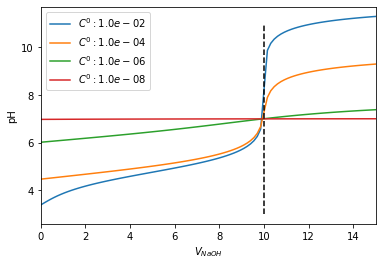

[3.387093309096158, 4.468285813089459, 6.018358994789697, 6.978423494142146]
[4.760522747305931, 5.015077617705675, 6.457197234348731, 6.99284550941143]
[8.228172426291431, 7.292309955551001, 7.006070227505226, 7.0000615451681725]
[11.30103024436863, 9.301065609858835, 7.38421631410906, 7.004391620388138]


In [107]:
HAs = [Solution(Mr=MrHAcO, K=Ka, Cmolar=C, V=VHAcO, solutionType='acid') for C in Cs]
NaOHs = [Solution(Mr=MrNAOH, K=1e-14, V=VNaOH, Cmolar=C0NaOH, solutionType='basic') for C0NaOH in Cs]

print(HAs[1].K)

pHs_0good=[]
pHs_halfGood = []
pHs_equivGood = []
pHs_postGood = []

Figure, ax = plt.subplots()
for i in range(len(HAs)):
    myTitration = Titration(HAs[i], NaOHs[i], Vti)
    myTitration.strongTitrantCalculateH()
    pHs = -np.log10(myTitration.H)

    V0 = 0
    zero = Titration(HAs[i], NaOHs[i], V0)
    zero.strongTitrantCalculateH()
    pH0good=-np.log10(zero.H)
    pHs_0good.append(pH0good)

    Vhalf = VHAcO/2
    half = Titration(HAs[i], NaOHs[i], Vhalf)
    half.strongTitrantCalculateH()
    pHhalfGood=-np.log10(half.H)
    pHs_halfGood.append(pHhalfGood)

    Vequiv = VHAcO
    equiv = Titration(HAs[i], NaOHs[i], Vequiv)
    equiv.strongTitrantCalculateH()
    pHequivGood=-np.log10(equiv.H)
    pHs_equivGood.append(pHequivGood)
    
    Vpost = VHAcO*3/2
    post = Titration(HAs[i], NaOHs[i], Vpost)
    post.strongTitrantCalculateH()
    pHpostGood=-np.log10(post.H)
    pHs_postGood.append(pHpostGood)

    ax.plot(Vti*1000, pHs, label = '$C^0: {:.1e}$' .format(HAs[i].Cmolar))
ax.set_xlabel('$V_{NaOH}$')
ax.set_ylabel('pH')
ax.set_xlim(0,15)
ax.legend()
ax.vlines(10, 3, 11, linestyles='--', color='black')
plt.show()

print(pHs_0good)
print(pHs_halfGood)
print(pHs_equivGood)
print(pHs_postGood)